In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [8]:
rw = pd.read_csv("winequality-red.csv", delimiter=";")
rw.columns = rw.columns.str.replace(" ", "_")
rw.insert(rw.shape[1],'type',0)
rw.head(5)
rw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [7]:
ww = pd.read_csv("winequality-white.csv", delimiter=";")
ww.columns = ww.columns.str.replace(" ", "_")
ww.insert(ww.shape[1], 'type', 1)
ww.head(5)
ww.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [10]:
df = pd.concat([rw,ww],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [11]:
ww=ww.iloc[:,:-1]
wwT = (ww-ww.min())/(ww.max()-ww.min())
wwMean = wwT.mean().to_dict()
rw=rw.iloc[:,:-1]
rwT = (rw-rw.min())/(rw.max()-rw.min())
rwMean = rwT.mean().to_dict()

In [13]:
rwMean

{'fixed_acidity': 0.32917144011467425,
 'volatile_acidity': 0.2793291183702144,
 'citric_acid': 0.2709756097560964,
 'residual_sugar': 0.11224695229038731,
 'chlorides': 0.1259875485617575,
 'free_sulfur_dioxide': 0.2095059412132582,
 'total_sulfur_dioxide': 0.14299573275699937,
 'density': 0.49021139313392054,
 'pH': 0.44969542972231824,
 'sulphates': 0.19649631318975527,
 'alcohol': 0.311228171453312,
 'quality': 0.527204502814258}

In [14]:
wwMean

{'fixed_acidity': 0.29372958350347084,
 'volatile_acidity': 0.1943540380627553,
 'citric_acid': 0.20132018478158414,
 'residual_sugar': 0.08882538133756882,
 'chlorides': 0.10911678357180232,
 'free_sulfur_dioxide': 0.11605604506141295,
 'total_sulfur_dioxide': 0.3001407364528718,
 'density': 0.13335987044912204,
 'pH': 0.4256969449497021,
 'sulphates': 0.3137754375302665,
 'alcohol': 0.40552694318945615,
 'quality': 0.479651558459236}

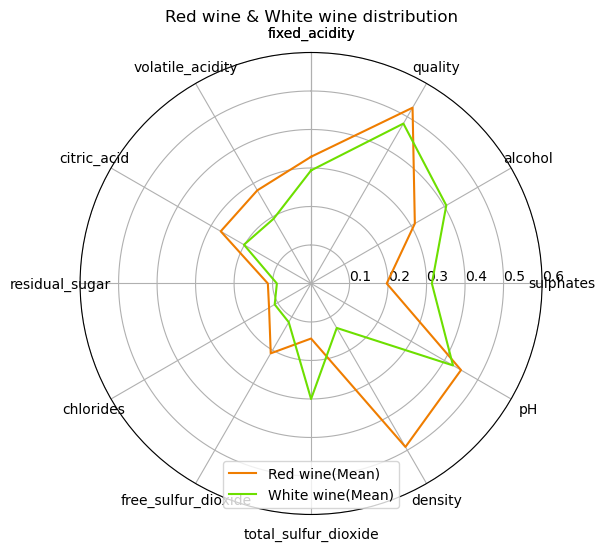

In [15]:
results=[]
results.append(rwMean)
results.append(wwMean)
data_length = len(results[0])
angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
labels = [key for key in results[0].keys()]
score = [[v for v in result.values()] for result in results]
score_a = np.concatenate((score[0], [score[0][0]]))
score_b = np.concatenate((score[1], [score[1][0]]))
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.subplot(111, polar=True)
ax.plot(angles, score_a, color='#EF7D00')
ax.plot(angles, score_b, color='#6DDF00')
ax.set_thetagrids(angles*180/np.pi, labels)
ax.set_theta_zero_location('N')
ax.set_rlim(0, 0.6)
ax.set_rlabel_position(270)
ax.set_title("Red wine & White wine distribution")
plt.legend(["Red wine(Mean)", "White wine(Mean)"], loc='lower center')
plt.show()
